In [1]:
import numpy as np
from PIL import Image, ImageOps
import os
import random
from matplotlib import pyplot as plt
import csv
from numpy import load
from numpy import savez_compressed

In [2]:
#Function to read images from directory
#Convert image to grayscale and return it as numpy array
def read_image(filename, width, height):
    #read image and get size
    image = Image.open(filename)
    
    #convert image to grayscale
    gray = ImageOps.grayscale(image)
    
    #resize the image
    resize = gray.resize((width, height), Image.ANTIALIAS)
    
    #convert grayscale image to numpy array
    im_array = np.array(resize)
    
    return(im_array)

In [3]:
#Function for creating empty numpy arrays for images
#Return array with size (sample size, imagepair, channels, image width, image height)
def create_empty_arrays(sample_size, width, height):
    x_same_pair = np.zeros([sample_size, 2, 1, height, width])
    y_same_pair = np.zeros([sample_size, 1])
    
    x_different_pair = np.zeros([sample_size, 2, 1, height, width])
    y_different_pair = np.zeros([sample_size, 1]) 
    
    #Print shapes of empty array
    print(x_same_pair.shape)
    print(y_same_pair.shape)
    print(x_different_pair.shape)
    print(y_different_pair.shape)
    
    return x_same_pair, y_same_pair, x_different_pair, y_different_pair

In [4]:
def create_image_pairs(sample_size, source_folder, width, height):
    #Create empty arrays
    x_same_pair, y_same_pair, x_different_pair, y_different_pair = create_empty_arrays(sample_size, width, height)
    
    #how many folders
    folder_len = len(os.listdir(source_folder))
    
    #create empty lists for saving image paths
    same_pair_path_list = []
    different_pair_path_list = []
    
    for i in range(sample_size):
        #list for saving
        buffer_list = []
        
        #randomly choose one folder and convert it to string
        random_folder = str(random.sample(os.listdir(source_folder), 1)[0])
        
        #get full folder path
        random_folder_path = source_folder + "/" + random_folder
        
        #get image array of random images
        image_array_1 =  read_image(random_folder_path + "/" + (random.sample(os.listdir(random_folder_path), 2))[0], width, height)
        image_array_2 = read_image(random_folder_path + "/" + (random.sample(os.listdir(random_folder_path), 2))[1], width, height)
        
        #append image path to list
        buffer_list.append(random_folder_path + "/" + (random.sample(os.listdir(random_folder_path), 2))[0])
        buffer_list.append(random_folder_path + "/" + (random.sample(os.listdir(random_folder_path), 2))[1])
        same_pair_path_list.append(buffer_list)
        
        #insert image arrays into data array
        x_same_pair[i, 0, 0, :, :] = image_array_1
        x_same_pair[i, 1, 0, :, :] = image_array_2
        y_same_pair[i] = 1
        
    #same for different image pairs
    for i in range(sample_size):
        buffer_list = []
        #randomly choose two different folders
        random_folders = (random.sample(os.listdir(source_folder), 2))
    
        #get path of the two folder
        random_folder_path_1 =  source_folder + "/" + random_folders[0]
        random_folder_path_2 = source_folder + "/" + random_folders[1]
        
        #get image array of random images
        image_array_1 = read_image(random_folder_path_1 + "/" + random.sample(os.listdir(random_folder_path_1), 1)[0], width, height)
        image_array_2 = read_image(random_folder_path_2 + "/" + random.sample(os.listdir(random_folder_path_2), 1)[0], width, height)
        
        #append image path to list 
        buffer_list.append(random_folder_path_1 + "/" + random.sample(os.listdir(random_folder_path_1), 1)[0])
        buffer_list.append(random_folder_path_2 + "/" + random.sample(os.listdir(random_folder_path_2), 1)[0])
        different_pair_path_list.append(buffer_list)
        
        #insert image arrays into data array
        x_different_pair[i, 0, 0, :, :] = image_array_1
        x_different_pair[i, 1, 0, :, :] = image_array_2
        y_different_pair[i] = 0
        
    #concatenate the two arrays
    x = np.concatenate([x_same_pair, x_different_pair], axis=0)
    y = np.concatenate([y_same_pair, y_different_pair], axis=0)

    #change shape of array
    x = np.einsum("abcde->abdec", x)
        
    #Open csv file for saving the image paths - for double checking purposes afterwards
    with open("data_paths.csv", "w") as file:
        csvwriter = csv.writer(file)
        csvwriter.writerows(same_pair_path_list)
        csvwriter.writerow("--------------------------------")
        csvwriter.writerows(different_pair_path_list)

    return x, y

In [5]:
def view_random_image_pairs(data):
    random_image = random.randint(0, x.shape[0])
    plt.figure(figsize=(12,7))
    ax = plt.subplot(2, 1, 1)
    if y[random_image][0] == 1:
        plt.title("Same image pair")
    else:
        plt.title("Different image pair")
    plt.imshow(data[random_image][0], interpolation='nearest')
    ax = plt.subplot(2, 1, 2)
    plt.imshow(data[random_image][1], interpolation='nearest')

In [6]:
def save_arrays(x, y, sample_size):
    savez_compressed(f'data_x_{sample_size}.npz', x)
    savez_compressed(f'data_y_{sample_size}.npz', y)
    print("saved successfully")

In [7]:
def load_arrays():
    dict_data_x = load('data_x.npz')
    dict_data_y = load('data_y.npz')
    x = dict_data_x['arr_0']
    y = dict_data_y['arr_0']
    return x, y

In [8]:
#average image size and height in testset
width = 1650
height = 123
sample_size = 2500
source_folder = "testset/lines"

In [9]:
%%time
x, y = create_image_pairs(sample_size, source_folder, width, height)

(2500, 2, 1, 123, 1650)
(2500, 1)
(2500, 2, 1, 123, 1650)
(2500, 1)
CPU times: user 1min 11s, sys: 5.86 s, total: 1min 17s
Wall time: 1min 18s


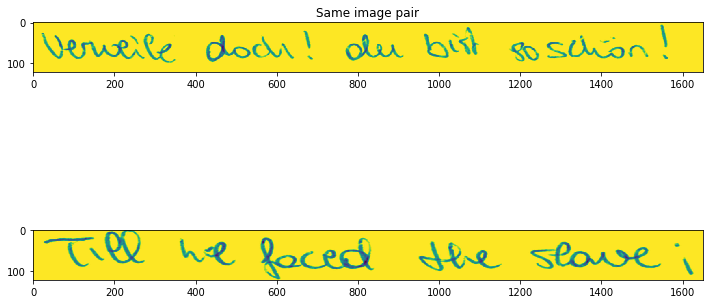

In [14]:
view_random_image_pairs(x)

In [15]:
save_arrays(x, y, sample_size)

saved successfully


In [303]:
x, y = load_arrays()